In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dm = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus.csv')

In [ ]:
dm.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_tmin', 'barajas_tmax', 'barajas_hrmedia',
       'barajas_hrmin', 'barajas_hrmax', 'barajas_velmedia', 'barajas_dir',
       'barajas_racha', 'barajas_presmed', 'barajas_presmin',
       'barajas_presmax', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_tmin',
       'caminos_tmax', 'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_tmin',
       'eliptica_tmax',

#***Variables Meteorológicas***

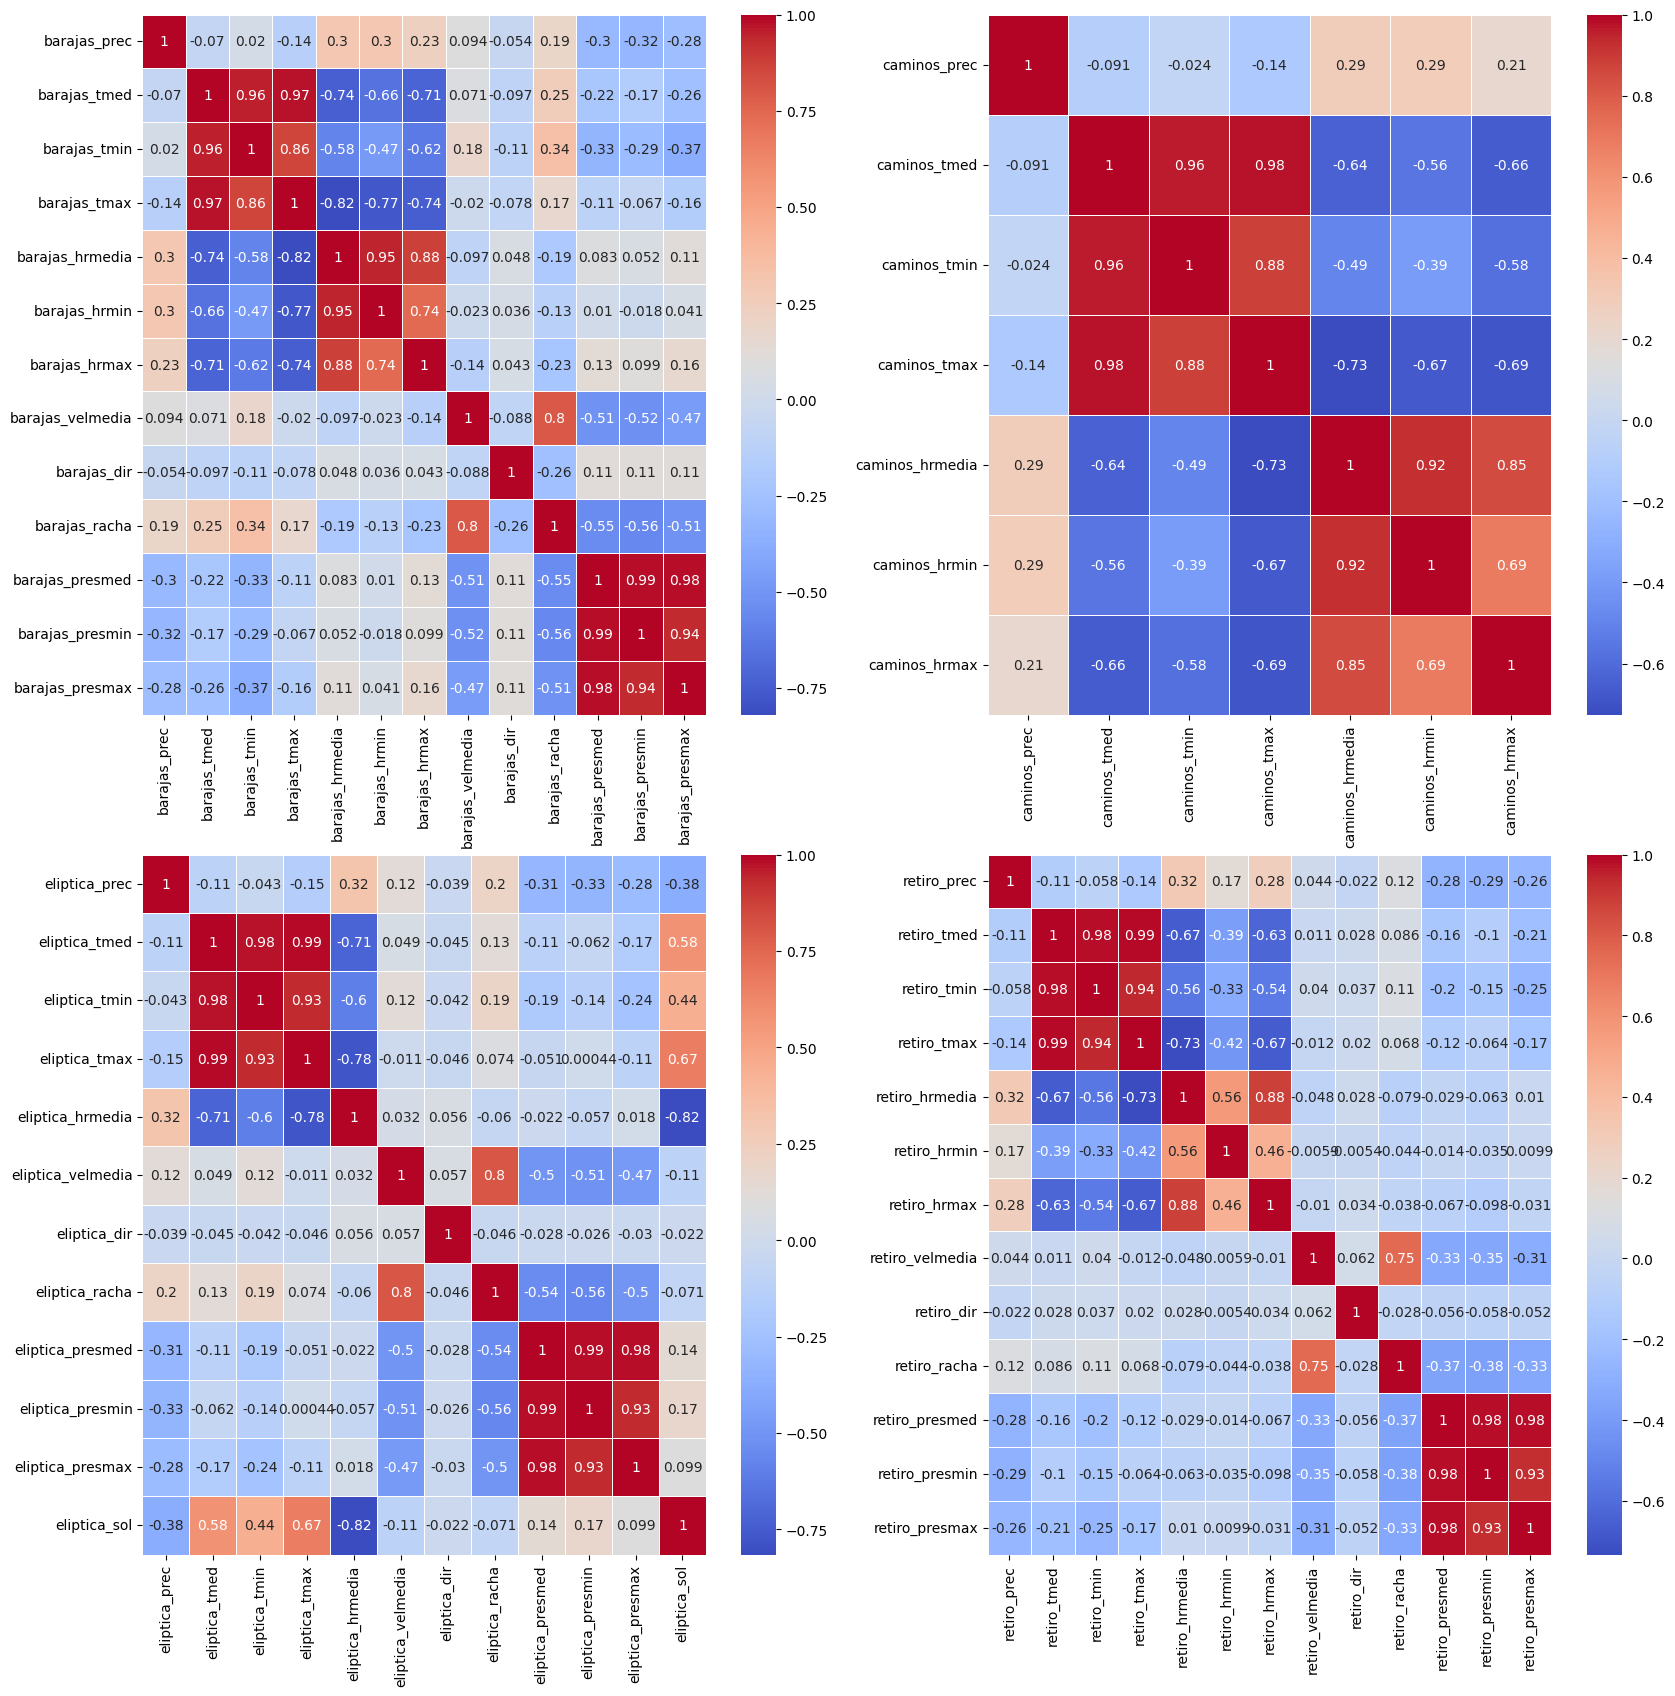

In [ ]:
# Variables meteorológicas por estación
heatmap_b = dm[['barajas_prec', 'barajas_tmed', 'barajas_tmin', 'barajas_tmax',
                'barajas_hrmedia', 'barajas_hrmin', 'barajas_hrmax',
                'barajas_velmedia', 'barajas_dir', 'barajas_racha',
                'barajas_presmed', 'barajas_presmin', 'barajas_presmax']]

heatmap_c = dm[['caminos_prec', 'caminos_tmed', 'caminos_tmin', 'caminos_tmax',
                'caminos_hrmedia', 'caminos_hrmin', 'caminos_hrmax']]

heatmap_e = dm[['eliptica_prec', 'eliptica_tmed', 'eliptica_tmin', 'eliptica_tmax',
                'eliptica_hrmedia', 'eliptica_velmedia', 'eliptica_dir',
                'eliptica_racha', 'eliptica_presmed', 'eliptica_presmin',
                'eliptica_presmax', 'eliptica_sol' ]]

heatmap_r = dm[['retiro_prec', 'retiro_tmed', 'retiro_tmin', 'retiro_tmax',
                'retiro_hrmedia', 'retiro_hrmin', 'retiro_hrmax', 'retiro_velmedia',
                'retiro_dir', 'retiro_racha', 'retiro_presmed', 'retiro_presmin', 'retiro_presmax' ]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

sns.heatmap(heatmap_b.corr(), annot=True, ax=axes[0,0], cmap='coolwarm', linewidths=0.5)
sns.heatmap(heatmap_c.corr(), annot=True, ax=axes[0,1], cmap='coolwarm', linewidths=0.5)
sns.heatmap(heatmap_e.corr(), annot=True, ax=axes[1,0], cmap='coolwarm', linewidths=0.5)
sns.heatmap(heatmap_r.corr(), annot=True, ax=axes[1,1], cmap='coolwarm', linewidths=0.5)

plt.show()

- En todas las estaciones, los valores medios se encuentran altamente correlacionados de manera positiva (como es de esperar) con los valores máximos y mínimos para las variables temperatura, humedad y presión atmosférica, y en el caso del viento la velocidad media con las rachas. En aras de simplificar y considerando que se conserva la información, se trabajará con los valores medios de estas variables.

- Destacable la correlación inversa entre la humedad y la temperatura.

- En cuanto a la radiación solar, dado que solo se encuentra disponible en la estación Plaza Elíptica, se descartará del análisis. Su efecto se encuentra en cierta medida reflejado en las variables tempperatura  y humedad.

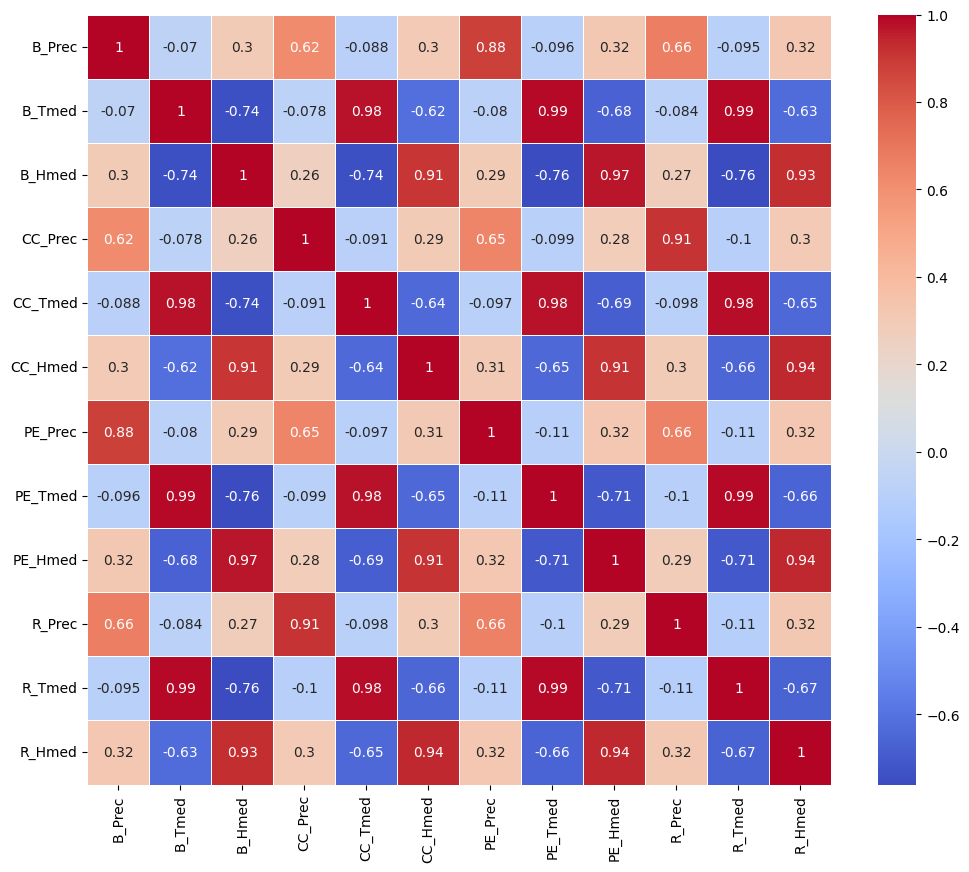

In [ ]:
# Similitud en meteorología para completar Cuatro Caminos
heatmap_data = dm[['barajas_prec', 'barajas_tmed', 'barajas_hrmedia', 'caminos_prec', 'caminos_tmed',
            'caminos_hrmedia', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmedia', 'retiro_prec', 'retiro_tmed', 'retiro_hrmedia' ]]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

axes.set_xticklabels(['B_Prec', 'B_Tmed', 'B_Hmed', 'CC_Prec', 'CC_Tmed', 'CC_Hmed',
            'PE_Prec', 'PE_Tmed', 'PE_Hmed', 'R_Prec', 'R_Tmed', 'R_Hmed'], fontsize=10)
axes.set_yticklabels(['B_Prec', 'B_Tmed', 'B_Hmed', 'CC_Prec', 'CC_Tmed', 'CC_Hmed',
            'PE_Prec', 'PE_Tmed', 'PE_Hmed', 'R_Prec', 'R_Tmed', 'R_Hmed'], fontsize=10)

plt.show()

Las variables meteorológicas de Cuatro Caminos muestran una alta correlación positiva, y la mayor similitud, con las de Retiro (esperable dado su cercanía). Entonces, se completarán los valores de presión y relacionados con el viento para Cuatro Caminos con los de Retiro.


#***Variables de Tráfico***

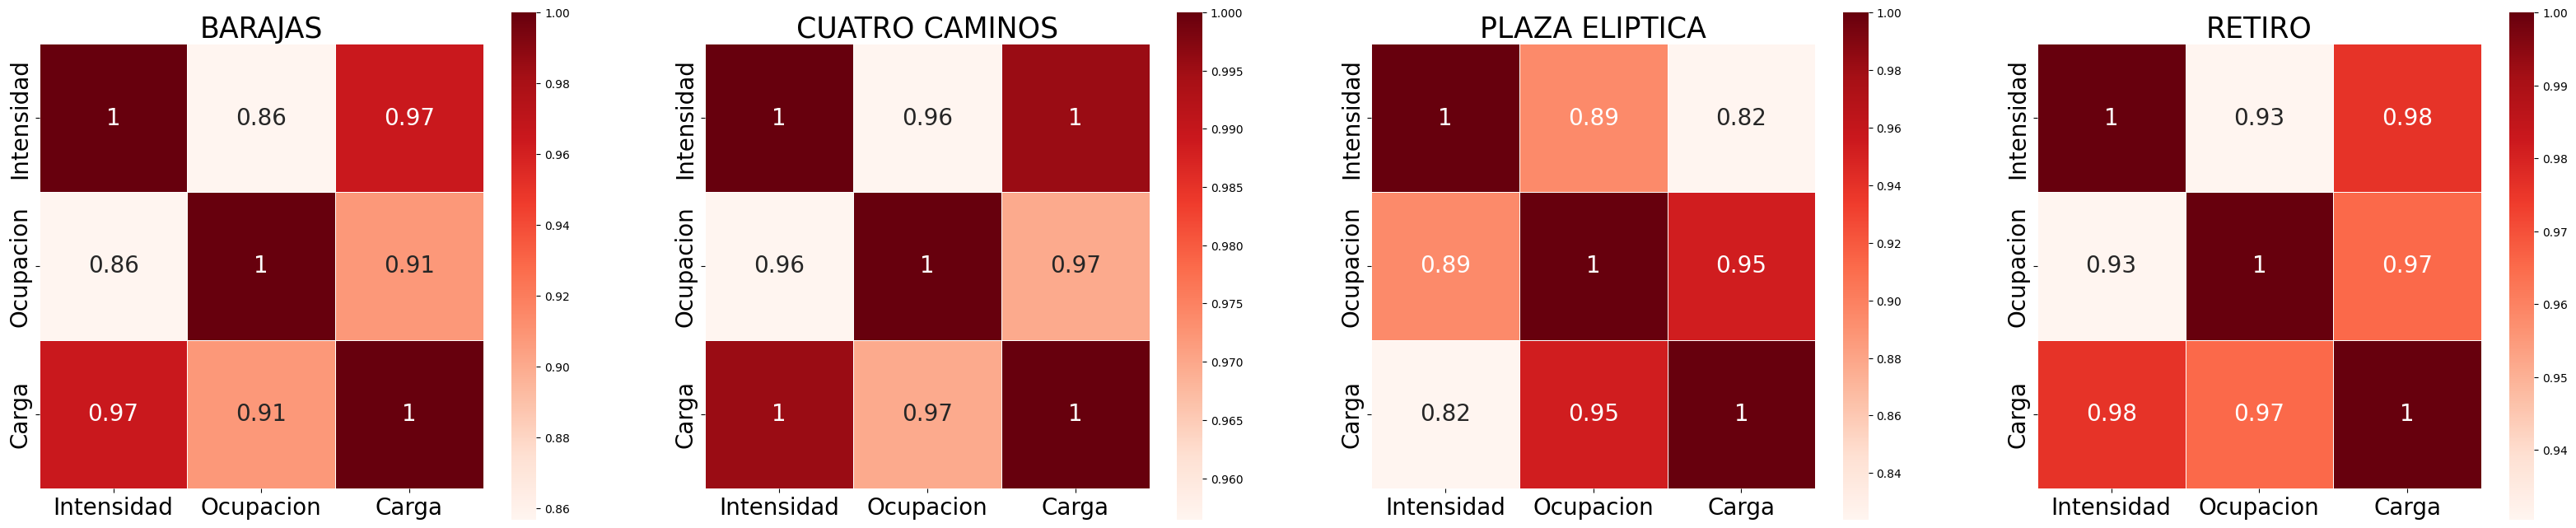

In [ ]:
heatmap_b = dm[['barajas_intensidad', 'barajas_ocupacion', 'barajas_carga']]
heatmap_c = dm[['caminos_intensidad', 'caminos_ocupacion', 'caminos_carga']]
heatmap_e = dm[['eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga']]
heatmap_r = dm[['retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40,8))

sns.heatmap(heatmap_b.corr(), annot=True, ax=axes[0], cmap='Reds', linewidths=0.5, annot_kws={'size':20}, square=True)
sns.heatmap(heatmap_c.corr(), annot=True, ax=axes[1], cmap='Reds', linewidths=0.5, annot_kws={'size':20}, square=True)
sns.heatmap(heatmap_e.corr(), annot=True, ax=axes[2], cmap='Reds', linewidths=0.5, annot_kws={'size':20}, square=True)
sns.heatmap(heatmap_r.corr(), annot=True, ax=axes[3], cmap='Reds', linewidths=0.5, annot_kws={'size':20}, square=True)

axes[0].set_xticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[0].set_yticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[1].set_xticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[1].set_yticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[2].set_xticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[2].set_yticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[3].set_xticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)
axes[3].set_yticklabels(['Intensidad','Ocupacion','Carga'], fontsize=20)

axes[0].set_title('BARAJAS', fontsize=25)
axes[1].set_title('CUATRO CAMINOS', fontsize=25)
axes[2].set_title('PLAZA ELIPTICA', fontsize=25)
axes[3].set_title('RETIRO', fontsize=25)

plt.show()

La variable carga se encuentra alta y positivamente correlacionada con la intensidad y la ocupación en cada una de las estaciones. Dado que es una medida de la congestión del tráfico basada en estas otras dos, será la única empleada en el análisis dado que incluye la mayor parte de la información.

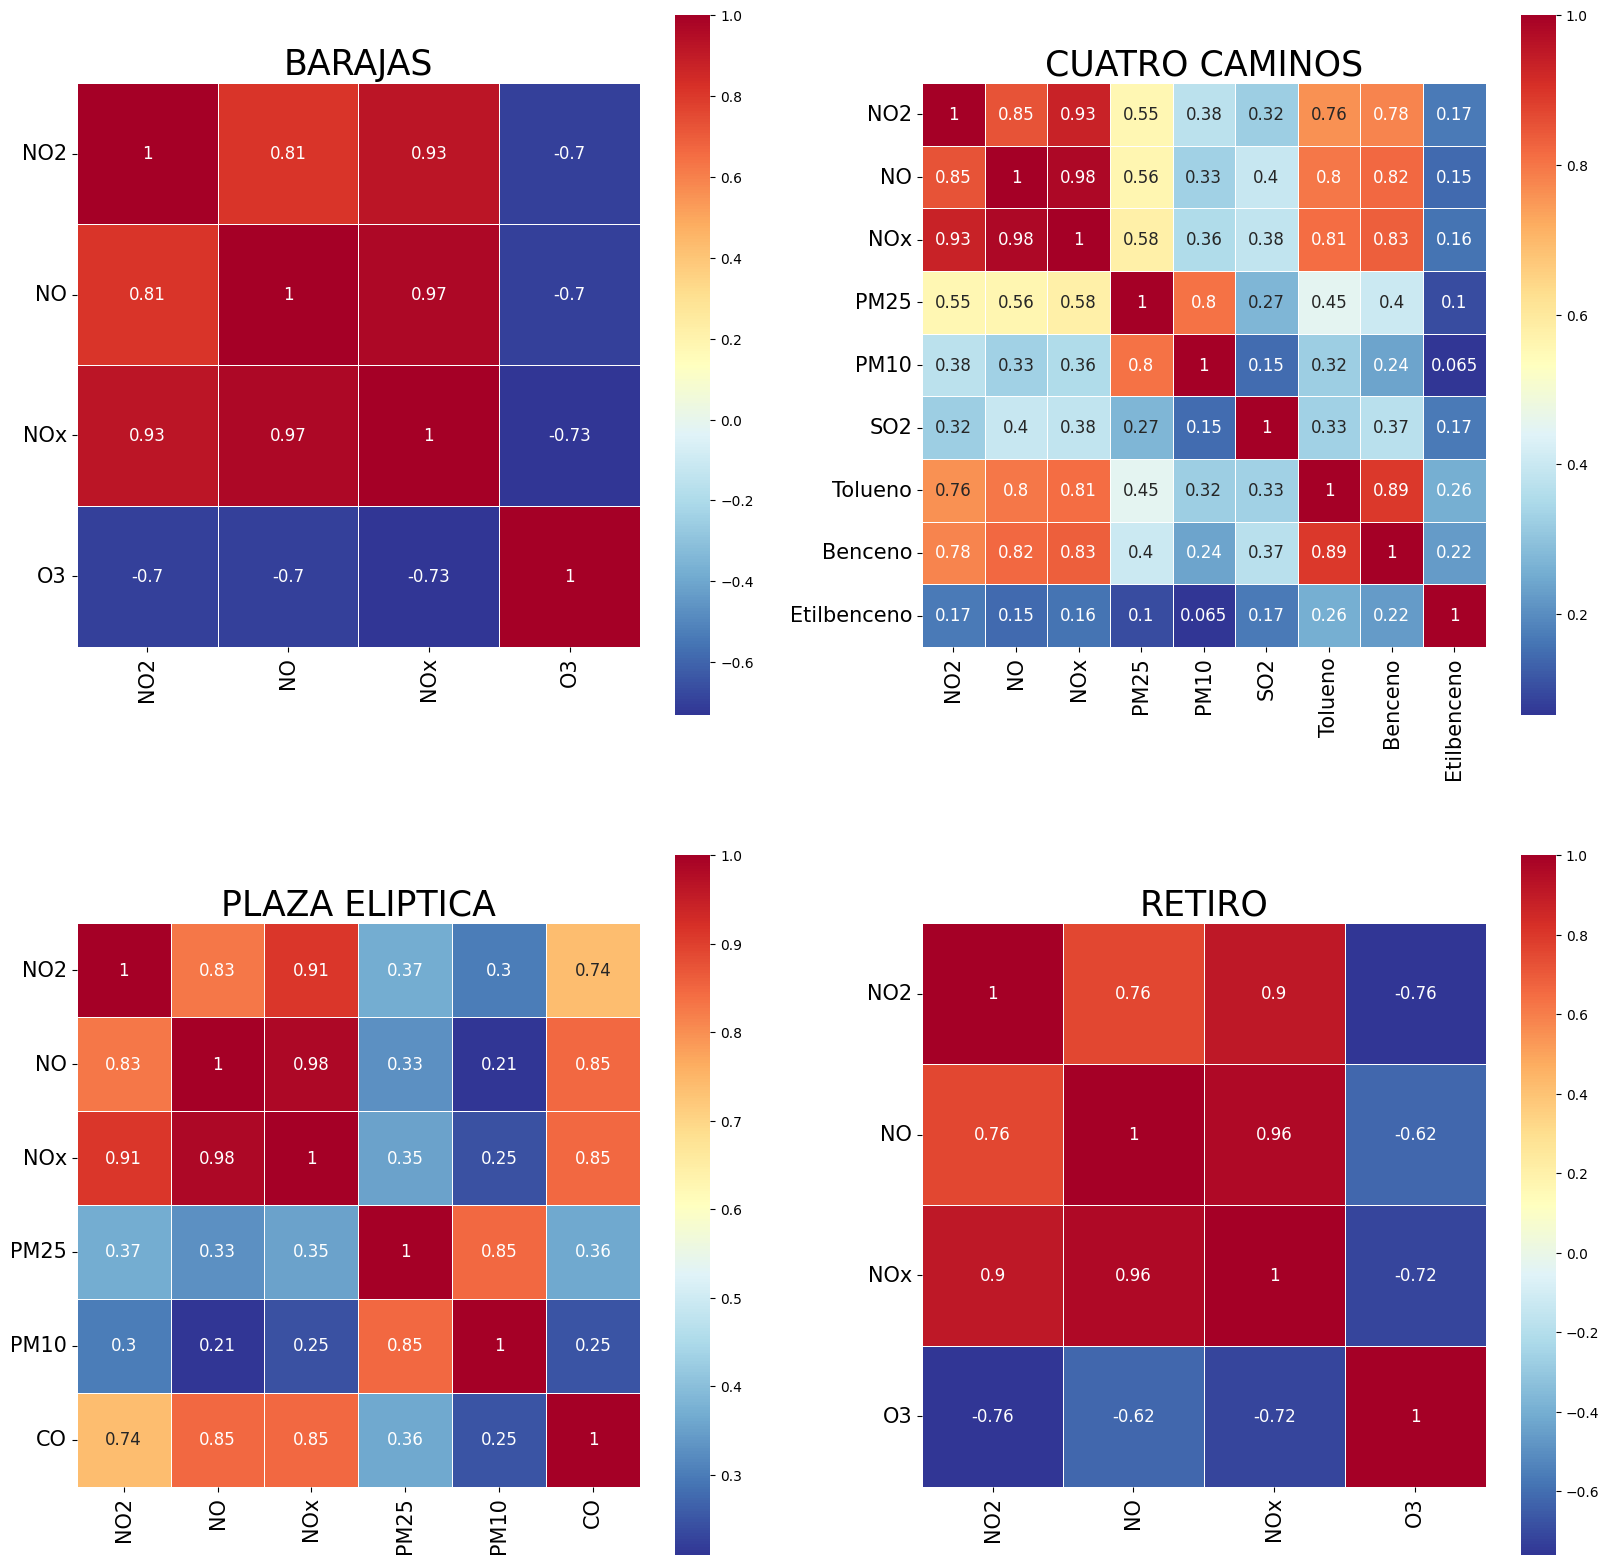

In [ ]:
heatmap_b = dm[['barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
                'barajas_oxido_nitrogeno', 'barajas_ozono']]

heatmap_c = dm[['caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
                'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
                'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno', 'caminos_etilbenceno']]

heatmap_e = dm[['eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
                'eliptica_oxido_nitrogeno', 'eliptica_pm25', 'eliptica_pm10', 'eliptica_monoxido_carbono']]

heatmap_r = dm[['retiro_dioxido_nitrogeno', 'retiro_monoxido_nitrogeno', 'retiro_oxido_nitrogeno', 'retiro_ozono']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

sns.heatmap(heatmap_b.corr(), annot=True, ax=axes[0,0], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':12}, square=True)
sns.heatmap(heatmap_c.corr(), annot=True, ax=axes[0,1], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':12}, square=True)
sns.heatmap(heatmap_e.corr(), annot=True, ax=axes[1,0], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':12}, square=True)
sns.heatmap(heatmap_r.corr(), annot=True, ax=axes[1,1], cmap='RdYlBu_r', linewidths=0.5, annot_kws={'size':12}, square=True)

axes[0,0].set_xticklabels(['NO2','NO','NOx','O3'], fontsize=15)
axes[0,0].set_yticklabels(['NO2','NO','NOx','O3'], fontsize=15)
axes[0,1].set_xticklabels(['NO2','NO','NOx','PM25','PM10','SO2','Tolueno','Benceno','Etilbenceno'], fontsize=15)
axes[0,1].set_yticklabels(['NO2','NO','NOx','PM25','PM10','SO2','Tolueno','Benceno','Etilbenceno'], fontsize=15)
axes[1,0].set_xticklabels(['NO2','NO','NOx','PM25','PM10','CO'], fontsize=15)
axes[1,0].set_yticklabels(['NO2','NO','NOx','PM25','PM10','CO'], fontsize=15)
axes[1,1].set_xticklabels(['NO2','NO','NOx','O3'], fontsize=15)
axes[1,1].set_yticklabels(['NO2','NO','NOx','O3'], fontsize=15)

axes[0,0].set_title('BARAJAS', fontsize=25)
axes[0,1].set_title('CUATRO CAMINOS', fontsize=25)
axes[1,0].set_title('PLAZA ELIPTICA', fontsize=25)
axes[1,1].set_title('RETIRO', fontsize=25)




plt.show()

Correlaciones altas entre contaminates (excepto partículas), entonces incluirlos en los modelos de predicción.

#***Distribuciones***

**RESULTADO:**

Las variables contaminantes muestran claras distribuciones asimétricas, además de las precipitaciones, la velocidad media y la dirección del viento. -> Transformación logarítmica.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_CA/master_h_fill_mplus_short.csv')
dataset.columns

Index(['fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo', 'barajas_prec',
       'barajas_tmed', 'barajas_hrmed', 'barajas_velmed', 'barajas_dir',
       'barajas_presmed', 'barajas_dioxido_nitrogeno',
       'barajas_monoxido_nitrogeno', 'barajas_oxido_nitrogeno',
       'barajas_ozono', 'barajas_intensidad', 'barajas_ocupacion',
       'barajas_carga', 'caminos_prec', 'caminos_tmed', 'caminos_hrmed',
       'caminos_velmed', 'caminos_dir', 'caminos_presmed',
       'caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
       'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
       'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
       'caminos_etilbenceno', 'caminos_intensidad', 'caminos_ocupacion',
       'caminos_carga', 'eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed',
       'eliptica_velmed', 'eliptica_dir', 'eliptica_presmed',
       'eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
       'eliptica_oxido_nitrogeno', 'eliptica_pm

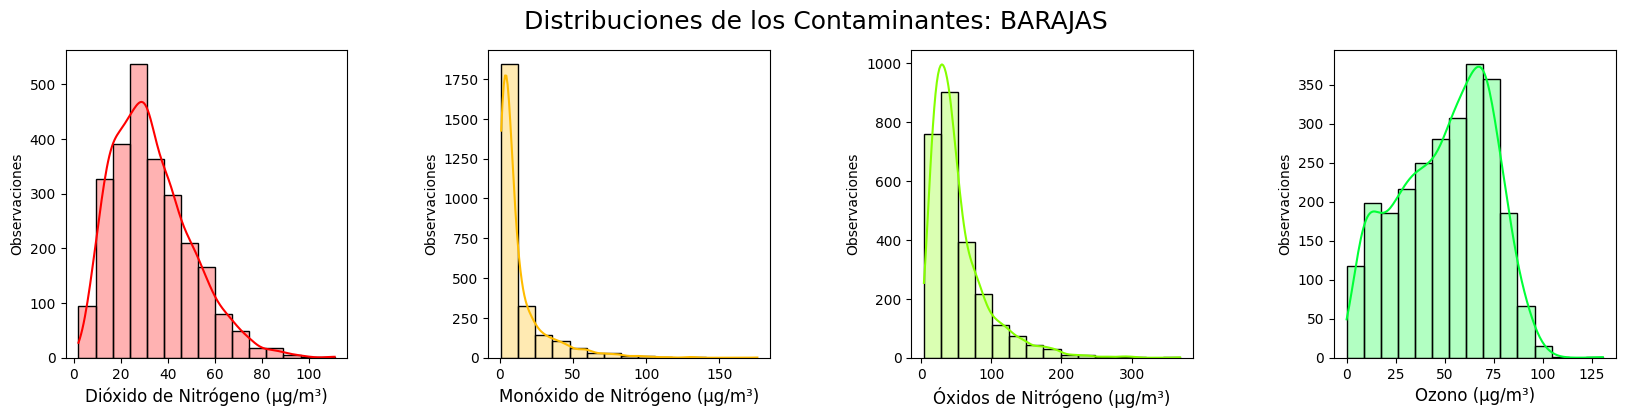

In [ ]:
# CONTAMINANTES BARAJAS
fig = plt.figure(1 , figsize = (20 , 4))
n = 0
columns_c = ['barajas_dioxido_nitrogeno', 'barajas_monoxido_nitrogeno',
             'barajas_oxido_nitrogeno', 'barajas_ozono']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[3].set_xlabel('Ozono (µg/m³)', fontsize=12)

fig.suptitle('Distribuciones de los Contaminantes: BARAJAS', fontsize=18, y=0.98)
plt.show()

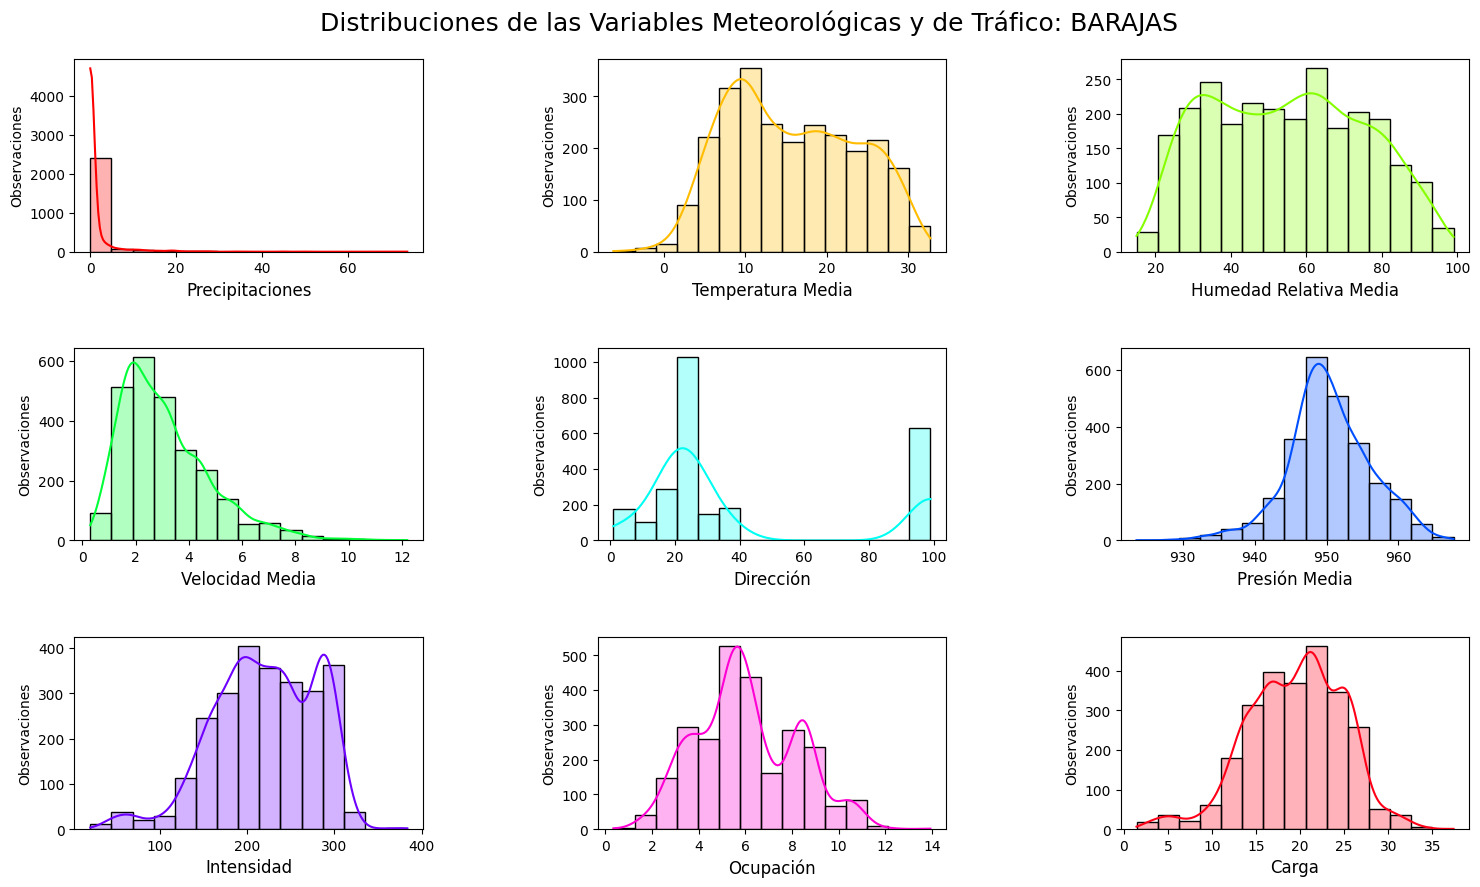

In [ ]:
# VARIABLES METEOROLOGICAS Y TRAFICO BARAJAS
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['barajas_prec', 'barajas_tmed', 'barajas_hrmed', 'barajas_velmed',
             'barajas_dir', 'barajas_presmed', 'barajas_intensidad', 'barajas_ocupacion', 'barajas_carga']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meteorológicas y de Tráfico: BARAJAS', fontsize=18, y=0.93)
plt.show()


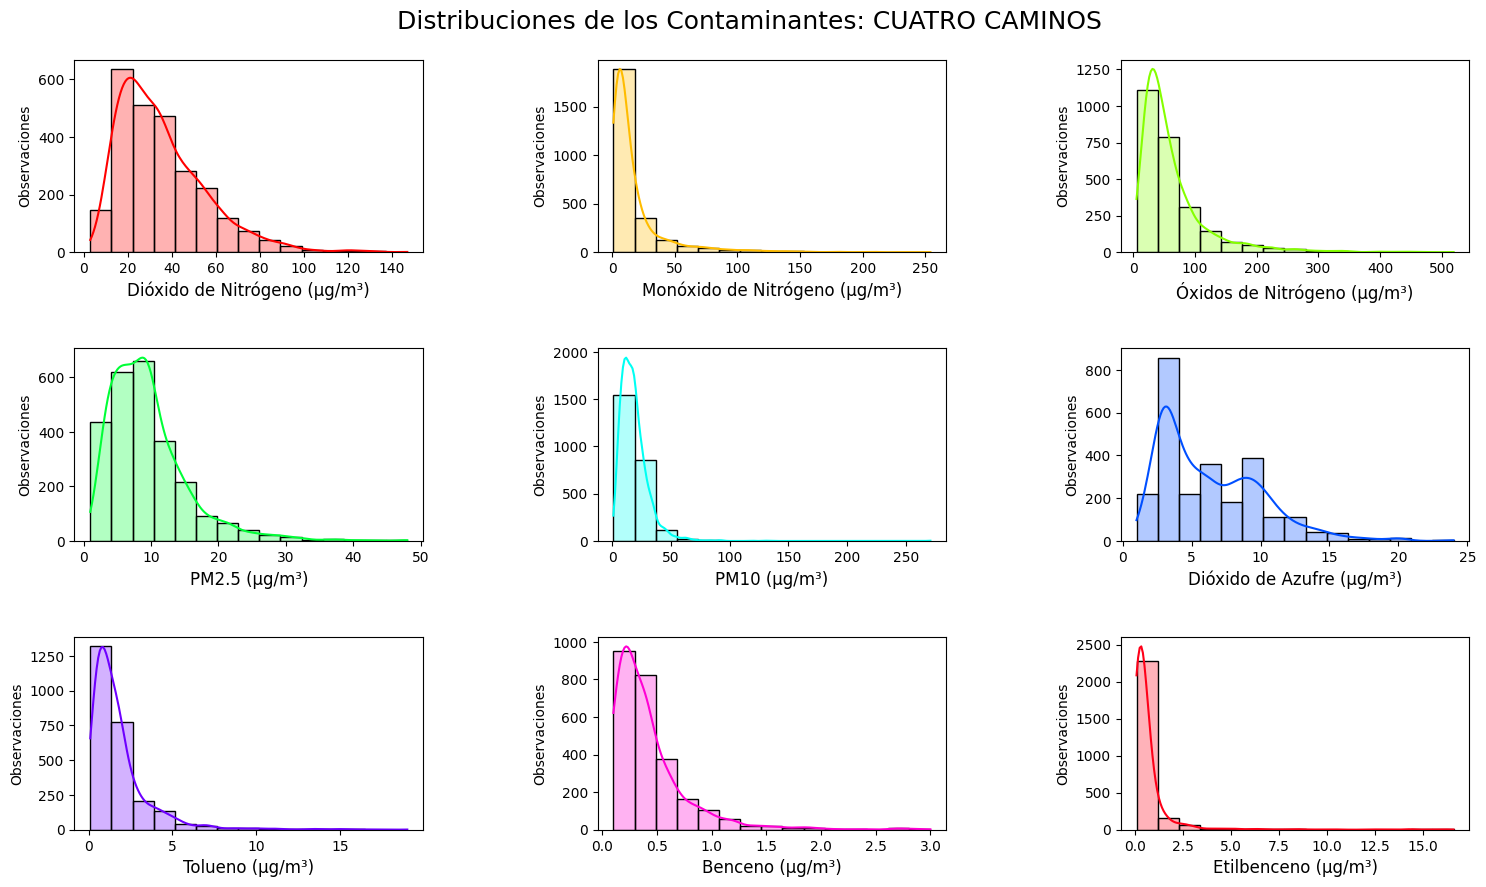

In [ ]:
# CONTAMINANTES CUATRO CAMINOS
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['caminos_dioxido_nitrogeno', 'caminos_monoxido_nitrogeno',
             'caminos_oxido_nitrogeno', 'caminos_pm25', 'caminos_pm10',
             'caminos_dioxido_azufre', 'caminos_tolueno', 'caminos_benceno',
             'caminos_etilbenceno']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[3].set_xlabel('PM2.5 (µg/m³)', fontsize=12)
fig.axes[4].set_xlabel('PM10 (µg/m³)', fontsize=12)
fig.axes[5].set_xlabel('Dióxido de Azufre (µg/m³)', fontsize=12)
fig.axes[6].set_xlabel('Tolueno (µg/m³)', fontsize=12)
fig.axes[7].set_xlabel('Benceno (µg/m³)', fontsize=12)
fig.axes[8].set_xlabel('Etilbenceno (µg/m³)', fontsize=12)

fig.suptitle('Distribuciones de los Contaminantes: CUATRO CAMINOS', fontsize=18, y=0.93)
plt.show()

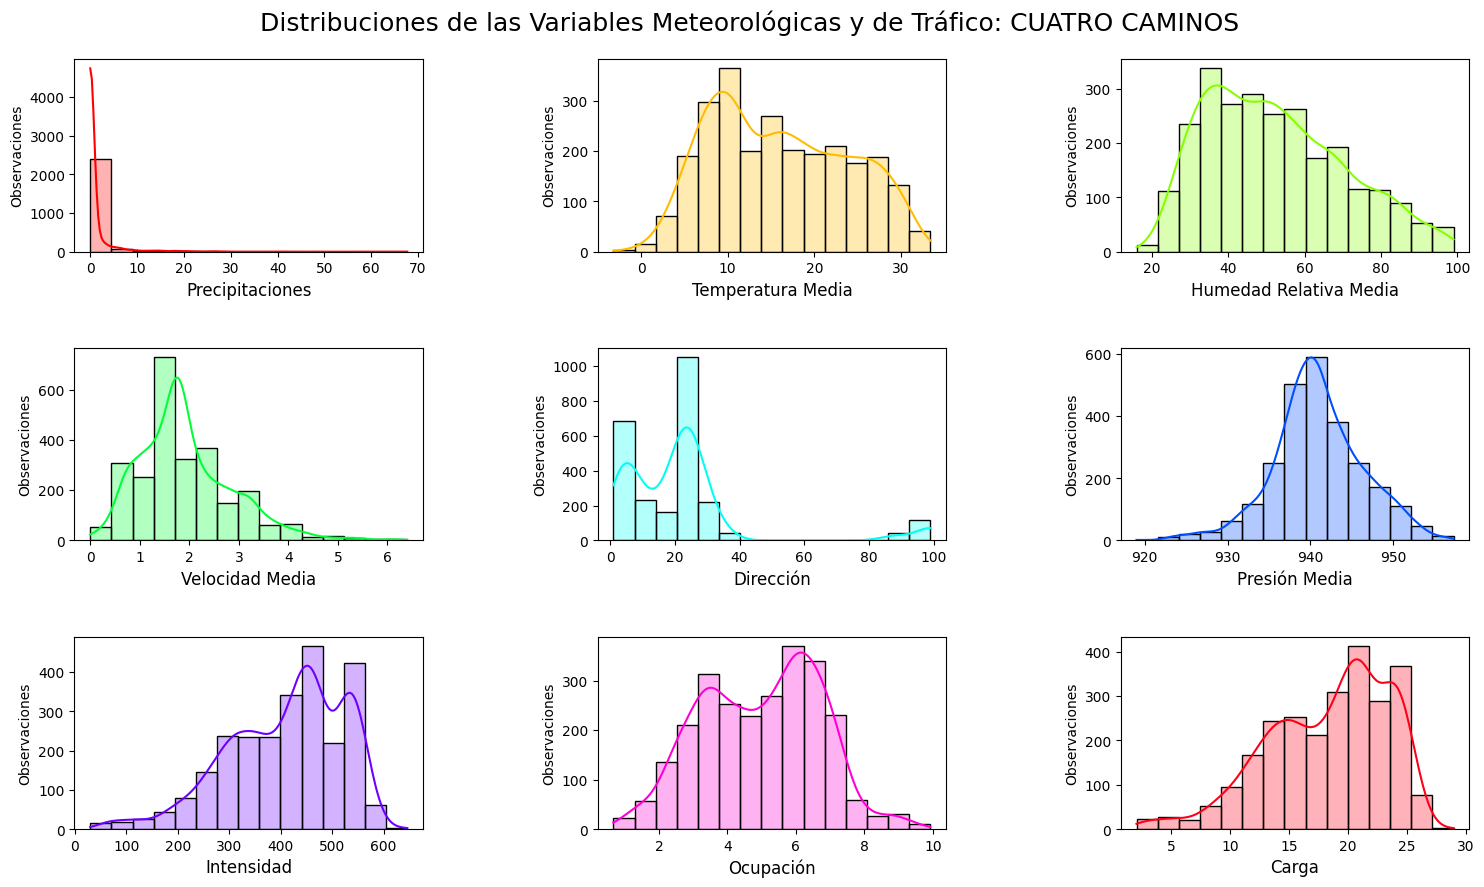

In [ ]:
# VARIABLES METEOROLOGICAS Y TRAFICO CUATRO CAMINOS
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['caminos_prec', 'caminos_tmed', 'caminos_hrmed', 'caminos_velmed',
             'caminos_dir', 'caminos_presmed', 'caminos_intensidad', 'caminos_ocupacion', 'caminos_carga']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meteorológicas y de Tráfico: CUATRO CAMINOS', fontsize=18, y=0.93)
plt.show()

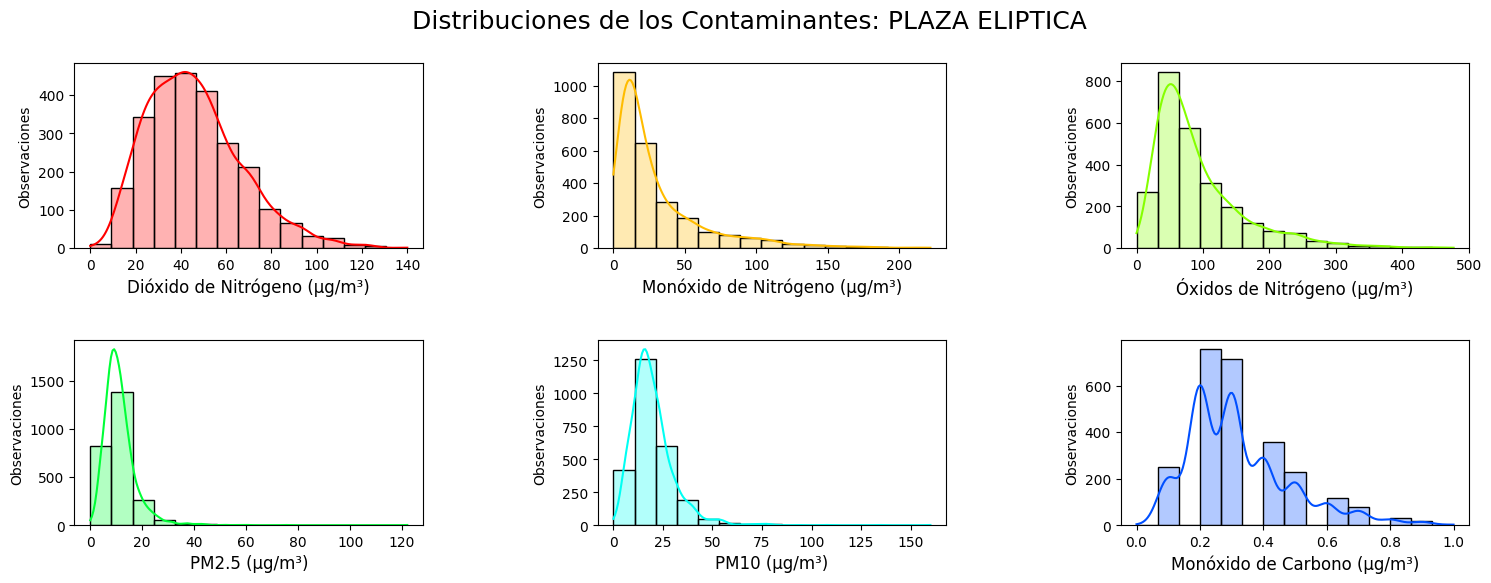

In [ ]:
# CONTAMINANTES PLAZA ELIPTICA
fig = plt.figure(1 , figsize = (18 , 6))
n = 0
columns_c = ['eliptica_dioxido_nitrogeno', 'eliptica_monoxido_nitrogeno',
             'eliptica_oxido_nitrogeno', 'eliptica_pm25', 'eliptica_pm10',
             'eliptica_monoxido_carbono']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[3].set_xlabel('PM2.5 (µg/m³)', fontsize=12)
fig.axes[4].set_xlabel('PM10 (µg/m³)', fontsize=12)
fig.axes[5].set_xlabel('Monóxido de Carbono (µg/m³)', fontsize=12)

fig.suptitle('Distribuciones de los Contaminantes: PLAZA ELIPTICA', fontsize=18, y=0.97)
plt.show()

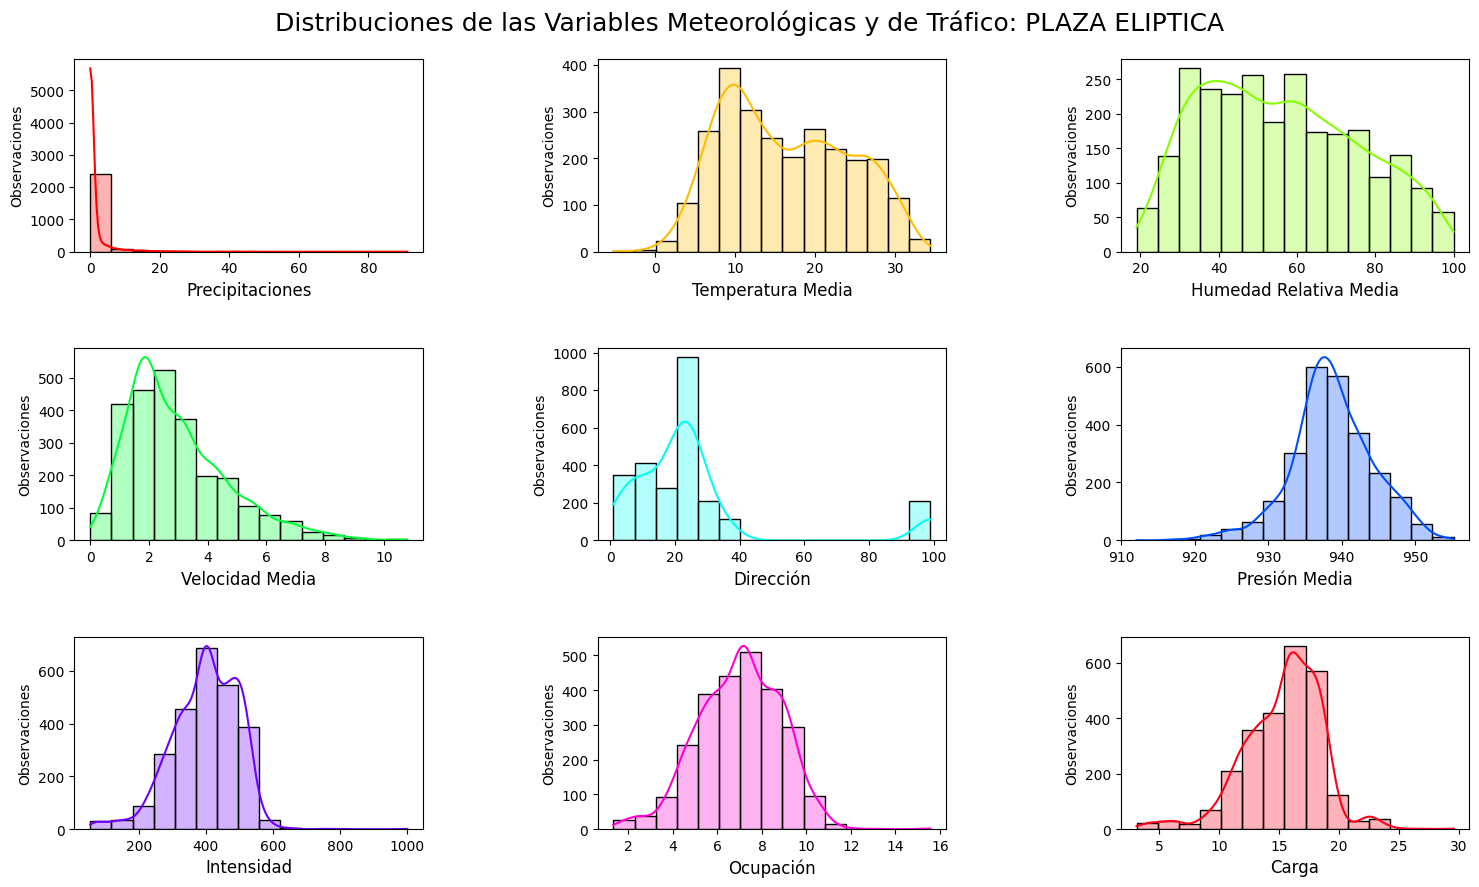

In [ ]:
# VARIABLES METEOROLOGICAS Y TRAFICO PLAZA ELIPTICA
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['eliptica_prec', 'eliptica_tmed', 'eliptica_hrmed', 'eliptica_velmed',
             'eliptica_dir', 'eliptica_presmed', 'eliptica_intensidad', 'eliptica_ocupacion', 'eliptica_carga']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meteorológicas y de Tráfico: PLAZA ELIPTICA', fontsize=18, y=0.93)
plt.show()

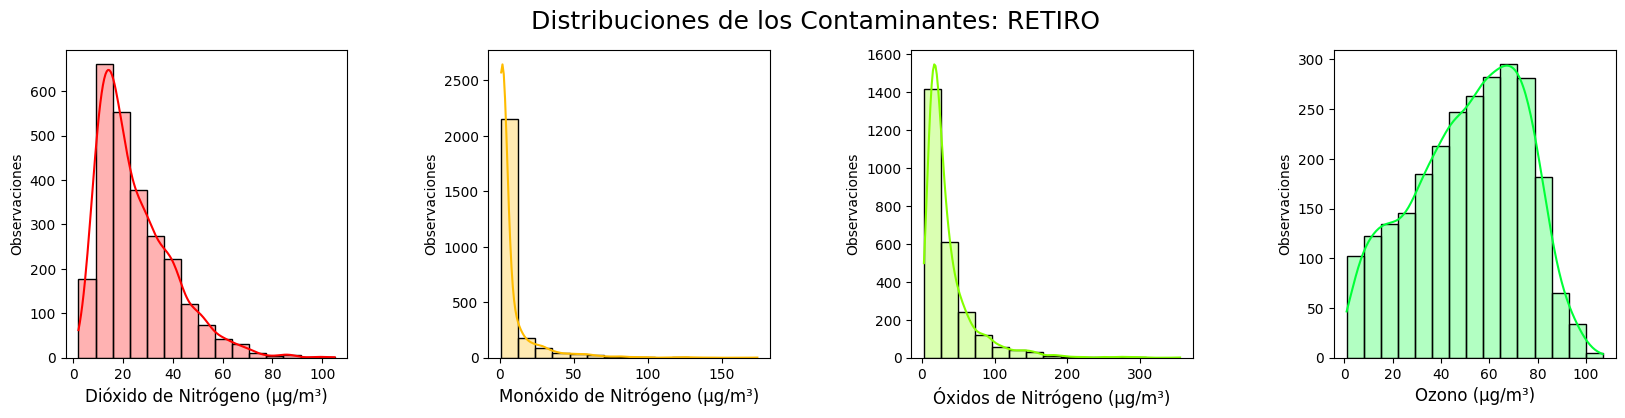

In [ ]:
# CONTAMINANTES RETIRO
fig = plt.figure(1 , figsize = (20 , 4))
n = 0
columns_c = ['retiro_dioxido_nitrogeno', 'retiro_monoxido_nitrogeno',
             'retiro_oxido_nitrogeno', 'retiro_ozono']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[3].set_xlabel('Ozono (µg/m³)', fontsize=12)

fig.suptitle('Distribuciones de los Contaminantes: RETIRO', fontsize=18, y=0.98)
plt.show()

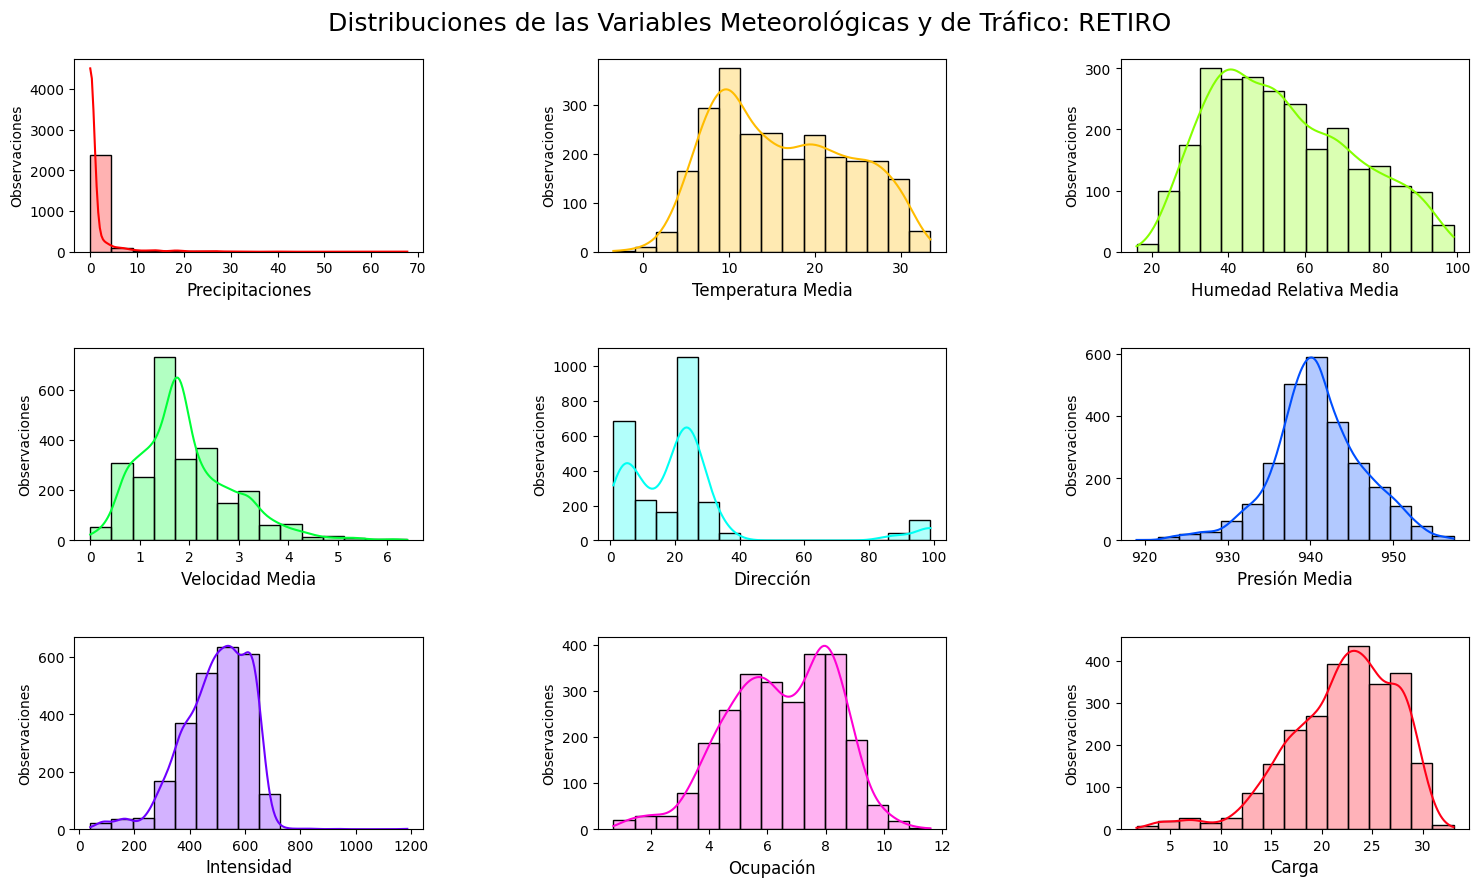

In [ ]:
# VARIABLES METEOROLOGICAS Y TRAFICO RETIRO
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['retiro_prec', 'retiro_tmed', 'retiro_hrmedia', 'retiro_velmed',
             'retiro_dir', 'retiro_presmed', 'retiro_intensidad', 'retiro_ocupacion', 'retiro_carga']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meteorológicas y de Tráfico: RETIRO', fontsize=18, y=0.93)
plt.show()

#***Todas las estaciones***

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_CA/master_v_mplus_short.csv')
dataset.columns

Index(['estacion', 'fecha', 'año', 'dia_año', 'mes', 'dia_mes', 'dia_tipo',
       'prec', 'tmed', 'hrmed', 'velmed', 'dir', 'presmed',
       'dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno', 'ozono',
       'pm25', 'pm10', 'intensidad', 'ocupacion', 'carga'],
      dtype='object')

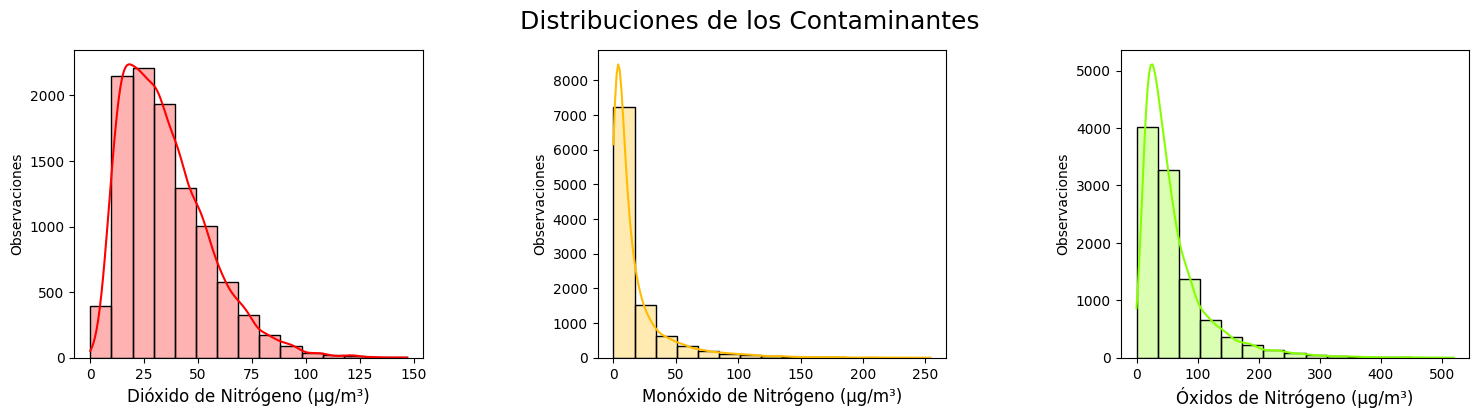

In [ ]:
# CONTAMINANTES
fig = plt.figure(1 , figsize = (18 , 4))
n = 0
columns_c = ['dioxido_nitrogeno', 'monoxido_nitrogeno', 'oxido_nitrogeno']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Dióxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[1].set_xlabel('Monóxido de Nitrógeno (µg/m³)', fontsize=12)
fig.axes[2].set_xlabel('Óxidos de Nitrógeno (µg/m³)', fontsize=12)
'''
fig.axes[3].set_xlabel('Ozono (µg/m³)', fontsize=12)
fig.axes[4].set_xlabel('PM2.5 (µg/m³)', fontsize=12)
fig.axes[5].set_xlabel('PM10 (µg/m³)', fontsize=12)
'''
fig.suptitle('Distribuciones de los Contaminantes', fontsize=18, y=0.98)
plt.show()

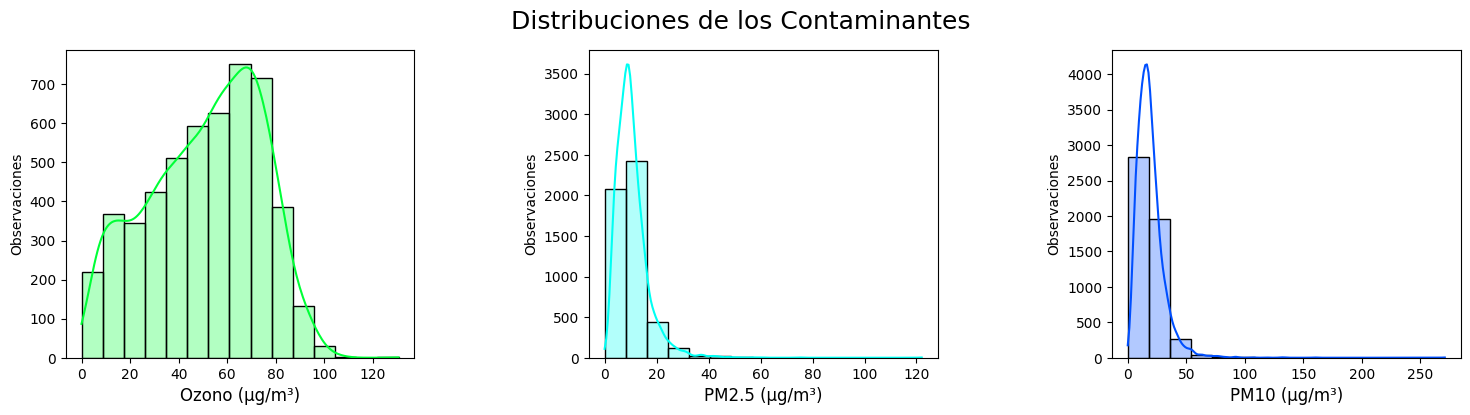

In [ ]:
# CONTAMINANTES OZONO / PARTICULAS

data_o = dataset[(dataset.estacion=='BARAJAS') | (dataset.estacion=='RETIRO')]
data_p = dataset[(dataset.estacion=='CUATRO CAMINOS') | (dataset.estacion=='PLAZA ELIPTICA')]

cmap = plt.cm.get_cmap('hsv',9)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)

sns.histplot(data_o, x=pd.to_numeric(data_o['ozono']), ax=axes[0], bins = 15, kde=True, color=cmap(3), alpha=0.3)
sns.histplot(data_p, x=pd.to_numeric(data_p['pm25']), ax=axes[1], bins = 15, kde=True, color=cmap(4), alpha=0.3)
sns.histplot(data_p, x=pd.to_numeric(data_p['pm10']), ax=axes[2], bins = 15, kde=True, color=cmap(5), alpha=0.3)

axes[0].set_xlabel('Ozono (µg/m³)', fontsize=12)
axes[0].set_ylabel('Observaciones')
axes[1].set_xlabel('PM2.5 (µg/m³)', fontsize=12)
axes[1].set_ylabel('Observaciones')
axes[2].set_xlabel('PM10 (µg/m³)', fontsize=12)
axes[2].set_ylabel('Observaciones')

fig.suptitle('Distribuciones de los Contaminantes', fontsize=18, y=0.98)
plt.show()

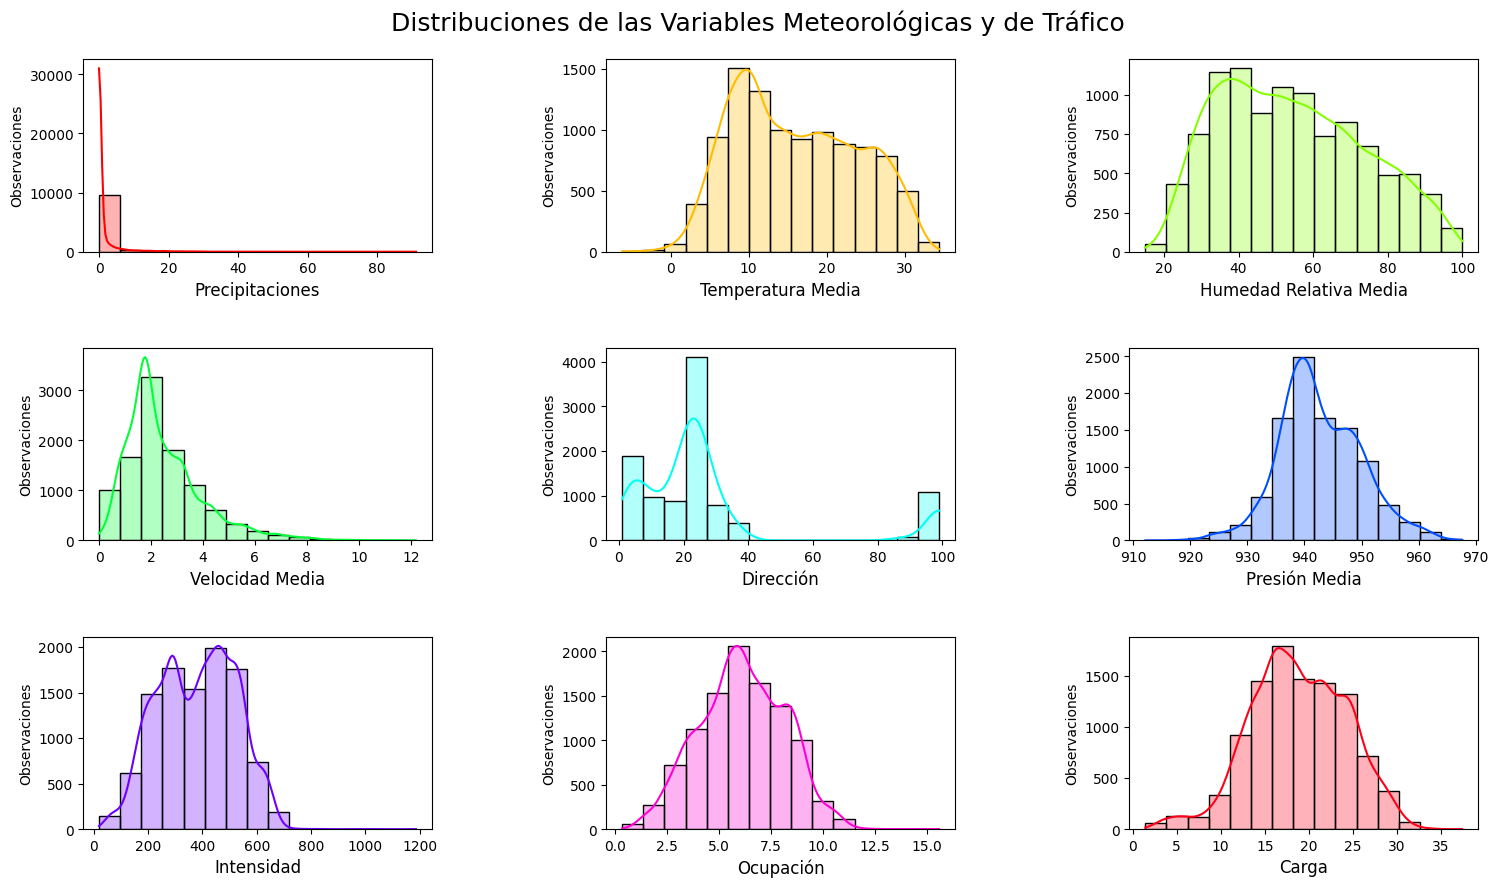

In [ ]:
# VARIABLES METEOROLOGICAS Y TRAFICO
fig = plt.figure(1 , figsize = (18 , 10))
n = 0
columns_c = ['prec', 'tmed', 'hrmed', 'velmed',
             'dir', 'presmed', 'intensidad', 'ocupacion', 'carga']
cmap = plt.cm.get_cmap('hsv',9)

for c in columns_c:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset, x=dataset[c], bins = 15, kde=True, color=cmap(n-1), alpha=0.3)
    fig.axes[n-1].set_ylabel('Observaciones', fontsize=10)

fig.axes[0].set_xlabel('Precipitaciones', fontsize=12)
fig.axes[1].set_xlabel('Temperatura Media', fontsize=12)
fig.axes[2].set_xlabel('Humedad Relativa Media', fontsize=12)
fig.axes[3].set_xlabel('Velocidad Media', fontsize=12)
fig.axes[4].set_xlabel('Dirección', fontsize=12)
fig.axes[5].set_xlabel('Presión Media', fontsize=12)
fig.axes[6].set_xlabel('Intensidad', fontsize=12)
fig.axes[7].set_xlabel('Ocupación', fontsize=12)
fig.axes[8].set_xlabel('Carga', fontsize=12)

fig.suptitle('Distribuciones de las Variables Meteorológicas y de Tráfico', fontsize=18, y=0.93)
plt.show()